In [1]:
%cd ..

/home/maximilian/docker_home/geant4ScintSim/analysis


In [2]:
import json

import pythonSimHelper as psh

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np
from numpy import unravel_index


In [3]:
file = open("../sim/build/out.json")

In [4]:
# returns JSON object as 
# a dictionary
data = json.load(file)

In [ ]:
psh.plotEdepDistr(8, data)

In [5]:
eparticle_data = []
edep_data = []
meanspred_data = []
spreadfrommaxedep_data = []
meanspred_data_x = []
meanspred_data_y = []
numberofhits_data=[]

for eventid in data["event"]:
    
    edep_dist_tmp = np.zeros((80,80), dtype=float)
    #if "tileHitEdep" not in data["event"][str(eventid)].keys():
        #print(eventid)
    #    continue
    #if data["event"][str(eventid)]["edep_detector"] <= 10:
    #    continue
    edep_data.append(data["event"][str(eventid)]["edep_detector"])
    eparticle_data.append(data["event"][str(eventid)]["particle_energy"])
    
    
    # calculating energy spread
    x_arr_tmp = []
    y_arr_tmp = []
    
    e_arr_tmp = []
    index = np.array([0,0])
    if "tileHitEdep" in data["event"][str(eventid)].keys():
        for key in data["event"][str(eventid)]["tileHitEdep"]:

            edep = data["event"][str(eventid)]["tileHitEdep"][key]

            x = (int(key)) % 80
            y = (int(key)) // 80

            x_arr_tmp.append(x)
            y_arr_tmp.append(y)
            e_arr_tmp.append(edep)

            index[0] += x*edep
            index[1] += y*edep  
            
            edep_dist_tmp[x][y] = edep


    index_mean = np.round(index/data["event"][str(eventid)]["edep_detector"])
    index_max = unravel_index(edep_dist_tmp.argmax(), edep_dist_tmp.shape)

    spread_1 = 0.
    spread_x = 0.
    spread_y = 0.
    spread_2 = 0.
    
    e_mean_tmp = np.mean(e_arr_tmp)
    for entry in range(len(e_arr_tmp)):
        spread_1 += np.sqrt((x_arr_tmp[entry]-index_mean[0])**2 +(y_arr_tmp[entry]-index_mean[1])**2)*(e_arr_tmp[entry]/e_mean_tmp)
        spread_2 += np.sqrt((x_arr_tmp[entry]-index_max[0])**2 +(y_arr_tmp[entry]-index_max[1])**2)*(e_arr_tmp[entry]/e_mean_tmp)
        spread_x += ((x_arr_tmp[entry]-index_mean[0])**2)*e_arr_tmp[entry]
        spread_y += ((y_arr_tmp[entry]-index_mean[1])**2)*e_arr_tmp[entry]
        
        
    meanspred_data.append(spread_1)
    spreadfrommaxedep_data.append(spread_2)
    meanspred_data_x.append(spread_x)
    meanspred_data_y.append(spread_y)
    numberofhits_data.append(len(e_arr_tmp))

/tmp/ipykernel_134417/4056486252.py:45: RuntimeWarning: invalid value encountered in true_divide
  index_mean = np.round(index/data["event"][str(eventid)]["edep_detector"])
/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
H_edep, x_edges_edep, y_edges_edep = np.histogram2d(eparticle_data, edep_data, bins=100)
H_spreadFromMean, x_edges_SFMean, y_edges_SFMean = np.histogram2d(eparticle_data, meanspred_data, bins=100)
H_spreadFromMax, x_edges_SFMax, y_edges_SFMax = np.histogram2d(eparticle_data, spreadfrommaxedep_data, bins=100)
H_spreadX, x_edges_SX, y_edges_SX = np.histogram2d(eparticle_data, meanspred_data_x, bins=100)
H_spreadY, x_edges_SY, y_edges_SY = np.histogram2d(eparticle_data, meanspred_data_y, bins=100)
H_NHits, x_edges_NHits, y_edges_NHits = np.histogram2d(eparticle_data, numberofhits_data, bins=100)

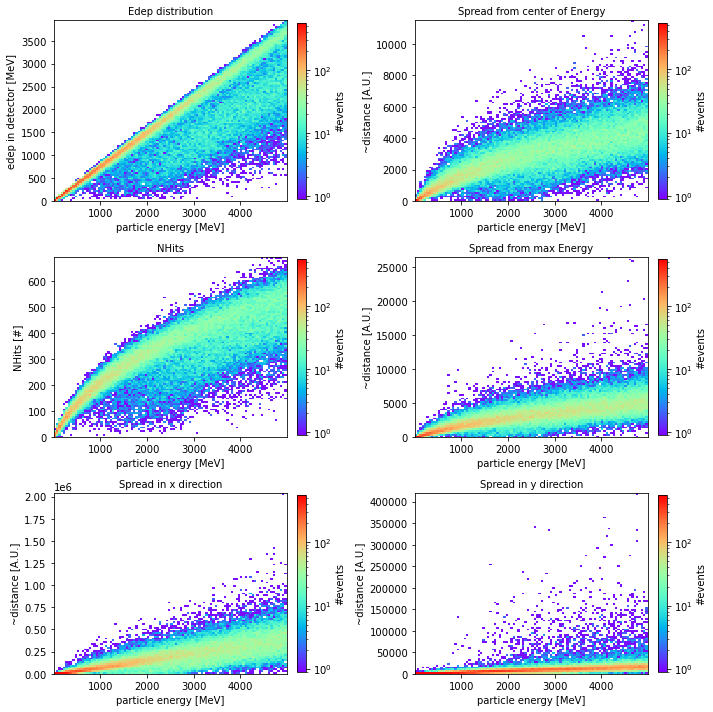

In [7]:
f_size = 10

fig, axs = plt.subplots(3,2,figsize=(10, 10))

##############
ax = axs[0][0]
scatter_plot = ax.pcolormesh(x_edges_edep, y_edges_edep, H_edep.T, norm=colors.LogNorm(vmin=0.9, vmax=H_edep.max()), cmap='rainbow')
cbar = fig.colorbar(scatter_plot, ax=ax, fraction=0.035, pad=0.04)
cbar.set_label("#events")

ax.set_title("Edep distribution", fontsize=f_size)
ax.set_ylabel("edep in detector [MeV]", fontsize=f_size)
ax.set_xlabel("particle energy [MeV]", fontsize=f_size)

##############
ax = axs[0][1]
scatter_plot = ax.pcolormesh(x_edges_SFMean, y_edges_SFMean, H_spreadFromMean.T, norm=colors.LogNorm(vmin=0.9, vmax=H_spreadFromMean.max()), cmap='rainbow')
cbar = fig.colorbar(scatter_plot, ax=ax, fraction=0.035, pad=0.04)
cbar.set_label("#events")

ax.set_title("Spread from center of Energy", fontsize=f_size)
ax.set_ylabel("~distance [A.U.]", fontsize=f_size)
ax.set_xlabel("particle energy [MeV]", fontsize=f_size)

##############
ax = axs[1][0]
scatter_plot = ax.pcolormesh(x_edges_NHits, y_edges_NHits, H_NHits.T, norm=colors.LogNorm(vmin=0.9, vmax=H_spreadFromMean.max()), cmap='rainbow')
cbar = fig.colorbar(scatter_plot, ax=ax, fraction=0.035, pad=0.04)
cbar.set_label("#events")

ax.set_title("NHits", fontsize=f_size)
ax.set_ylabel("NHits [#]", fontsize=f_size)
ax.set_xlabel("particle energy [MeV]", fontsize=f_size)

##############
ax = axs[1][1]
scatter_plot = ax.pcolormesh(x_edges_SFMax, y_edges_SFMax, H_spreadFromMax.T, norm=colors.LogNorm(vmin=0.9, vmax=H_spreadFromMean.max()), cmap='rainbow')
cbar = fig.colorbar(scatter_plot, ax=ax, fraction=0.035, pad=0.04)
cbar.set_label("#events")

ax.set_title("Spread from max Energy", fontsize=f_size)
ax.set_ylabel("~distance [A.U.]", fontsize=f_size)
ax.set_xlabel("particle energy [MeV]", fontsize=f_size)

##############
ax = axs[2][0]
scatter_plot = ax.pcolormesh(x_edges_SX, y_edges_SX, H_spreadX.T, norm=colors.LogNorm(vmin=0.9, vmax=H_spreadFromMean.max()), cmap='rainbow')
cbar = fig.colorbar(scatter_plot, ax=ax, fraction=0.035, pad=0.04)
cbar.set_label("#events")

ax.set_title("Spread in x direction", fontsize=f_size)
ax.set_ylabel("~distance [A.U.]", fontsize=f_size)
ax.set_xlabel("particle energy [MeV]", fontsize=f_size)

##############
ax = axs[2][1]
scatter_plot = ax.pcolormesh(x_edges_SY, y_edges_SY, H_spreadY.T, norm=colors.LogNorm(vmin=0.9, vmax=H_spreadFromMean.max()), cmap='rainbow')
cbar = fig.colorbar(scatter_plot, ax=ax, fraction=0.035, pad=0.04)
cbar.set_label("#events")

ax.set_title("Spread in y direction", fontsize=f_size)
ax.set_ylabel("~distance [A.U.]", fontsize=f_size)
ax.set_xlabel("particle energy [MeV]", fontsize=f_size)

fig.tight_layout()
plt.show()

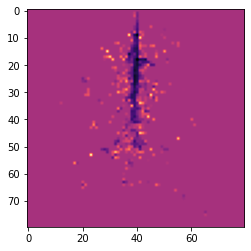

4703.897003139769


In [43]:
#def plotCroppedImage(eventID: int, data: dict):

eventID = 1
f_size = 110

#x_data = []
#y_data = []
edep_data = np.zeros((80,80), dtype=float)

for key in data["event"][str(eventID)]["tileHitEdep"]:
    #x_data.append(data["geometry"]["tiles"][key]["posX"])
    #y_data.append(data["geometry"]["tiles"][key]["posY"])
    x = (int(key)+1)%80
    y = (int(key)+1) // 80
    edep_data[x][y] = np.log(data["event"][str(eventID)]["tileHitEdep"][key])

plt.imshow(edep_data, cmap="magma_r")
plt.show()


print(data["event"][str(eventID)]["particle_energy"])
    

In [9]:
from numpy import unravel_index
index = unravel_index(edep_data.argmax(), edep_data.shape)

In [47]:
edep_data_test = edep_data[:,20:60].flatten()


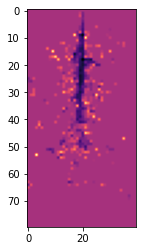

(3200,)

In [49]:
plt.imshow(edep_data_test.reshape((80,40)), cmap="magma_r")
plt.show()
edep_data_test.shape

In [50]:
x_data = []
y_data = []

#edep_data = np.zeros((80,80), dtype=float)

for eventid in data["event"]:
    edep_data = np.zeros((80,80), dtype=float)
    index = np.array([0,0])
    # print(eventid)
    if "tileHitEdep" not in data["event"][str(eventid)].keys():
        #print(eventid)
        continue
    if data["event"][str(eventid)]["edep_detector"] <= 10:
        continue
    for key in data["event"][str(eventid)]["tileHitEdep"]:
        #x_data.append(data["geometry"]["tiles"][key]["posX"])
        #y_data.append(data["geometry"]["tiles"][key]["posY"])
        x = (int(key))%80
        y = (int(key)) // 80
        edep = data["event"][str(eventid)]["tileHitEdep"][key]
        edep_data[x][y] = np.log(edep)
        index[0] += x*edep
        index[1] += y*edep        

    #index = np.round(index/data["event"][str(eventid)]["edep_detector"])
    #print(index)
    #index = unravel_index(edep_data.argmax(), edep_data.shape)
    #print(index1 , " | ", index)
    #edep_data_test = edep_data[int(index[0])-20:int(index[0])+20,int(index[1])-20:int(index[1])+20]
    edep_data_test = edep_data[:,20:60]
    if (np.sum(np.exp(edep_data_test))/data["event"][str(eventid)]["edep_detector"]) < 0.8:
        print("WARNING")
        continue
    
    if edep_data_test.shape != (80,40):
        print("ERROR")
        continue
    x_data.append(np.array(edep_data_test))
    y_data.append(data["event"][str(eventid)]["particle_energy"]/5000)

In [9]:
x_data = []
y_data = []

#edep_data = np.zeros((80,80), dtype=float)

for eventid in data["event"]:
    edep_data = np.zeros((80,80), dtype=float)
    # print(eventid)
    if "tileHitEdep" not in data["event"][str(eventid)].keys():
        #print(eventid)
        continue
    if data["event"][str(eventid)]["edep_detector"] <= 10:
        continue
    for key in data["event"][str(eventid)]["tileHitEdep"]:
        #x_data.append(data["geometry"]["tiles"][key]["posX"])
        #y_data.append(data["geometry"]["tiles"][key]["posY"])
        x = (int(key)) % 80
        y = (int(key)) // 80
        edep = data["event"][str(eventid)]["tileHitEdep"][key]
        edep_data[x][y] = edep
   

    x_data.append(np.array(edep_data)/100)
    y_data.append(data["event"][str(eventid)]["particle_energy"]/5000)

In [51]:
len(x_data)

59827

In [11]:
#data["event"]["1"]["tileHitEdep"]

In [52]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import nn

In [53]:
from matplotlib import pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")

In [54]:
np.array(x_data).shape

(59827, 80, 40)

In [55]:
x_train = torch.Tensor(np.array(x_data).reshape(-1, 1, 80, 40).astype('float32'))

y_train = torch.Tensor(y_data).unsqueeze(-1)

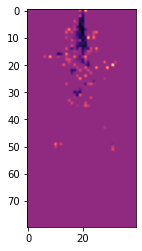

In [56]:
# Test if everything is still ok
plt.imshow(np.array(x_train[0][0]), cmap="magma_r")
plt.show()

In [57]:
class cnn_data( Dataset ):
    
    def __init__( self, imgs, labels ):
        self.imgs = imgs
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.imgs[idx], self.labels[idx]

In [58]:
train_cnn_dataset = cnn_data(x_train, y_train.float())

In [59]:
train_cnn_dataloader = DataLoader( train_cnn_dataset, batch_size=32, shuffle=True )

In [84]:
class ConvNet2D(nn.Module):
    
    def __init__(self, in_ch=1, ch=4, out_dim=1, img_sz=40):
        super().__init__()
        self.conv1 = nn.Conv2d(in_ch, ch, kernel_size=4, bias=True, stride=1, padding=2)
        self.conv2 = nn.Conv2d(ch, 1, kernel_size=4, bias=True, stride=1, padding=2)
        self.max = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.dense1 = nn.Linear(int(80*40/16), 200, bias=True)
        self.dense2 = nn.Linear(200, 100, bias=True)
        self.dense3 = nn.Linear(100, out_dim, bias=True)
        
    def forward(self, x):
        self.net = nn.Sequential(
            #self.max,
            self.conv1,
            nn.ReLU(),
            self.max,
            nn.ReLU(),
            self.conv2,
            self.max,
            self.flatten,
            self.dense1,
            nn.ReLU(),
            self.dense2,
            nn.ReLU(),
            self.dense3,
            #nn.ReLU(),
            #self.dense4,
            #nn.ReLU()
            #nn.Sigmoid()
        )
        y = self.net(x)
        #return torch.exp(y)
        return y
    

In [65]:
class ConvNet2D(nn.Module):
    
    def __init__(self, in_ch=1, ch=4, out_dim=1, img_sz=40):
        super().__init__()
        self.flatten = nn.Flatten()
        self.denseIN = nn.Linear(img_sz**2, 1, bias=True)
        self.dense1 = nn.Linear(400, 200, bias=True)
        self.dense2 = nn.Linear(200, 100, bias=True)
        self.dense3 = nn.Linear(100, out_dim, bias=True)
        
    def forward(self, x):
        self.net = nn.Sequential(
            #self.max,
            self.flatten,
            self.denseIN,
            nn.ReLU(),
            #self.dense1,
            #nn.ReLU(),
            #self.dense2,
            #nn.ReLU(),
            #self.dense3,
            #nn.ReLU(),
            #self.dense4,
            #nn.ReLU()
            #nn.Sigmoid()
        )
        y = self.net(x)
        #return torch.exp(y)
        return y
    

In [66]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [85]:
loss_fn = nn.MSELoss()

In [86]:
def train_epoch( dataloader, model, loss_fn, optimizer ):
    
    size = len( dataloader.dataset )
    
    for batch, (X, y) in enumerate(dataloader):

        # pass data through network
        pred = model(X)
        
        # compute loss
        loss = loss_fn( pred, y )

        # reset gradients in optimizer
        optimizer.zero_grad()
        
        # compute gradients
        loss.backward()
        
        # update weights with optimizer
        optimizer.step()
        
        # print the training loss every 100 updates
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print( f"current batch loss: {loss:>7f}  [{current:>5d}/{size:>5d}]" )

In [87]:
# a useful function to present things clearer
def separator():
    print( "-----------------------------------------------" )

epochs = 20

# re-initialise the model and the optimizer
model = ConvNet2D(ch=10, img_sz=80).to(device)
learning_rate = 5e-4
weight_decay = 1e-1
optimizer = torch.optim.Adam( model.parameters(), lr=learning_rate, weight_decay=weight_decay )
separator()
print( "model architecture ")
separator()
print( model )

# track train and val losses
trn_losses = []
val_losses = []

for t in range(epochs):
    separator()
    print( f"Epoch {t+1}" )
    separator()
    train_epoch( train_cnn_dataloader, model, loss_fn, optimizer )
    separator()
    #trn_loss = trn_pass( train_cnn_dataloader, model, loss_fn )
    #trn_losses.append( trn_loss )
    #separator()
    #val_loss = val_pass( val_cnn_dataloader, model, loss_fn )
    #val_losses.append( val_loss )
    separator()
    print( "|" )
    
print("Done!")

-----------------------------------------------
model architecture 
-----------------------------------------------
ConvNet2D(
  (conv1): Conv2d(1, 10, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(10, 1, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
  (max): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dense1): Linear(in_features=200, out_features=200, bias=True)
  (dense2): Linear(in_features=200, out_features=100, bias=True)
  (dense3): Linear(in_features=100, out_features=1, bias=True)
)
-----------------------------------------------
Epoch 1
-----------------------------------------------
current batch loss: 0.315329  [    0/59827]
current batch loss: 0.034873  [ 3200/59827]
current batch loss: 0.023635  [ 6400/59827]
current batch loss: 0.022413  [ 9600/59827]
current batch loss: 0.010994  [12800/59827]
current batch loss: 0.026307  [16000/59827]
current batch loss: 0.020668

current batch loss: 0.017745  [16000/59827]
current batch loss: 0.019851  [19200/59827]
current batch loss: 0.050955  [22400/59827]
current batch loss: 0.022619  [25600/59827]
current batch loss: 0.018392  [28800/59827]
current batch loss: 0.018644  [32000/59827]
current batch loss: 0.028363  [35200/59827]
current batch loss: 0.015793  [38400/59827]
current batch loss: 0.017181  [41600/59827]
current batch loss: 0.018113  [44800/59827]
current batch loss: 0.020804  [48000/59827]
current batch loss: 0.025093  [51200/59827]
current batch loss: 0.015693  [54400/59827]
current batch loss: 0.019889  [57600/59827]
-----------------------------------------------
-----------------------------------------------
|
-----------------------------------------------
Epoch 9
-----------------------------------------------
current batch loss: 0.019176  [    0/59827]
current batch loss: 0.019749  [ 3200/59827]
current batch loss: 0.021536  [ 6400/59827]
current batch loss: 0.014946  [ 9600/59827]
curren

current batch loss: 0.026112  [ 9600/59827]
current batch loss: 0.034659  [12800/59827]
current batch loss: 0.014601  [16000/59827]
current batch loss: 0.029194  [19200/59827]
current batch loss: 0.018035  [22400/59827]
current batch loss: 0.027215  [25600/59827]
current batch loss: 0.019076  [28800/59827]
current batch loss: 0.015331  [32000/59827]
current batch loss: 0.027739  [35200/59827]
current batch loss: 0.039011  [38400/59827]
current batch loss: 0.029387  [41600/59827]
current batch loss: 0.024744  [44800/59827]
current batch loss: 0.016759  [48000/59827]
current batch loss: 0.044213  [51200/59827]
current batch loss: 0.029442  [54400/59827]
current batch loss: 0.012699  [57600/59827]
-----------------------------------------------
-----------------------------------------------
|
-----------------------------------------------
Epoch 17
-----------------------------------------------
current batch loss: 0.028808  [    0/59827]
current batch loss: 0.025389  [ 3200/59827]
curre

In [75]:
model.eval()

ConvNet2D(
  (conv1): Conv2d(1, 10, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(10, 1, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
  (max): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dense1): Linear(in_features=200, out_features=100, bias=True)
  (dense2): Linear(in_features=100, out_features=100, bias=True)
  (dense3): Linear(in_features=100, out_features=1, bias=True)
  (net): Sequential(
    (0): Conv2d(1, 10, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
    (4): Conv2d(10, 1, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=200, out_features=100, bias=True)
    (8): ReLU()
    (9): Linear(in_featur

In [21]:
with torch.no_grad():
    #model.eval()
    #model_ev = model.eval()
    pred = model(train_cnn_dataset[1][0])
    print(pred)

tensor([[0.4822]])


In [22]:
float(pred)

0.4822181165218353

In [23]:
float(train_cnn_dataset[1][1])

0.45616912841796875

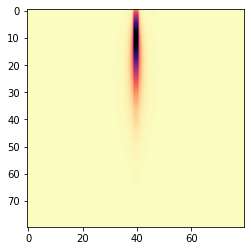

In [16]:
plt.imshow(np.array(x_train.mean(0).reshape((80,80))), cmap="magma_r")
plt.show()

In [88]:
abw = []
with torch.no_grad():
    for index in range(47000):
        pred = model(train_cnn_dataset[index][0])
        abw.append(float(pred)-float(train_cnn_dataset[index][1]))

In [89]:
abw_np = np.array(abw)*5000

In [90]:
abw_np.mean()

140.35766001198778

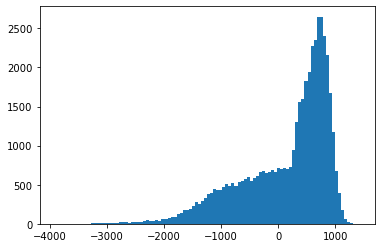

In [91]:
plt.hist(abw_np, bins=100)
#plt.xlim(0,5000)
plt.show()

In [92]:
np.std(abw_np)

763.8261914719817

best: 569